# Decision Tree

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data-sets/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
df['species'] = df['species'].map({"setosa" : 0, "versicolor": 1, "virginica": 2})

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = df.drop('species', axis=1)
y = df['species']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

featureImportances = model.feature_importances_

featureImportancesDf = pd.DataFrame({'Features' : X.columns, 'Importances': featureImportances})
featureImportancesDf.sort_values('Importances', ascending=False, inplace=True)

print(featureImportancesDf)

(120, 4) (30, 4) (120,) (30,)
       Features  Importances
3   petal_width     0.577395
2  petal_length     0.405935
0  sepal_length     0.016670
1   sepal_width     0.000000


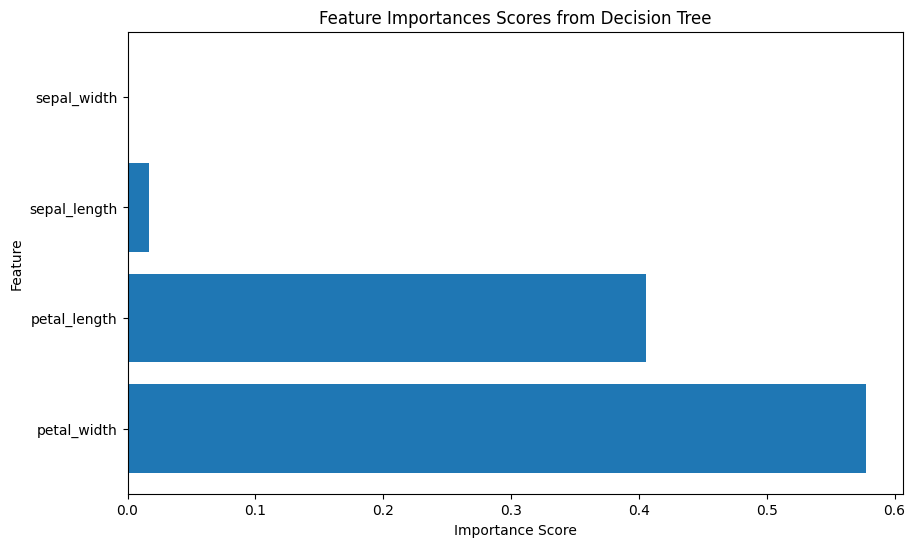

In [9]:

#plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(featureImportancesDf['Features'], featureImportancesDf['Importances'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances Scores from Decision Tree')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

#Apply SelectKBest with chi2
select_k_best = SelectKBest(score_func=chi2, k=2)
x_train_k_best = select_k_best.fit_transform(x_train, y_train)

print('Selected features:', x_train.columns[select_k_best.get_support()])

Selected features: Index(['petal_length', 'petal_width'], dtype='object')


In [ ]:
feature_scores = select_k_best.scores_
featureImportancesDf = pd.DataFrame({'Features' : X.columns, 'Scores': feature_scores})
featureImportancesDf.sort_values('Scores', ascending=False, inplace=True)

print(featureImportancesDf)

       Features     Scores
2  petal_length  92.082199
3   petal_width  52.604868
0  sepal_length   8.227146
1   sepal_width   3.122062


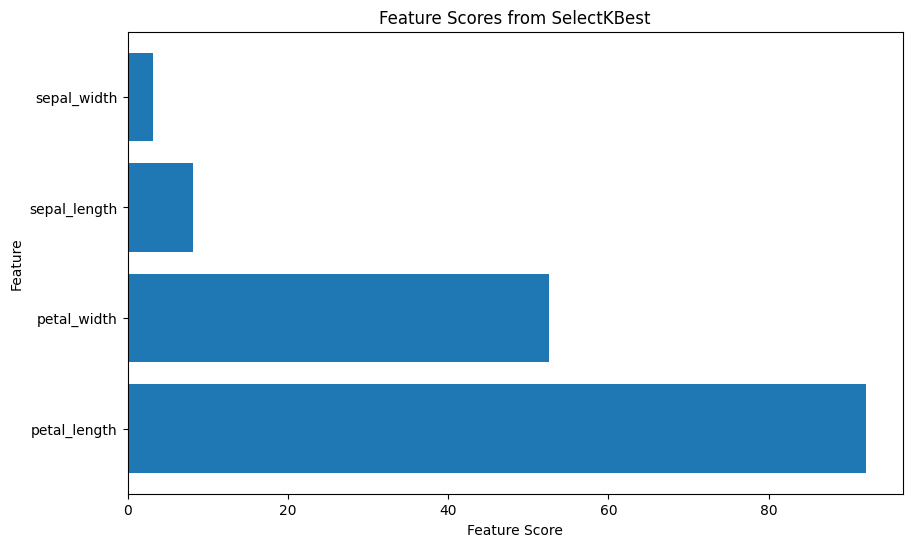

In [12]:

#plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(featureImportancesDf['Features'], featureImportancesDf['Scores'])
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.title('Feature Scores from SelectKBest')
plt.show()

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model)
X_train_rfe = rfe.fit_transform(x_train, y_train)

print("Selected Features:", x_train.columns[rfe.get_support()])

Selected Features: Index(['petal_length', 'petal_width'], dtype='object')


In [ ]:
rfe_score = rfe.score
featureImportancesDf = pd.DataFrame({'Features' : X.columns, 'RFE Scores': feature_scores})
featureImportancesDf.sort_values('RFE Scores', ascending=False, inplace=True)

print(featureImportancesDf)

       Features  RFE Scores
2  petal_length   92.082199
3   petal_width   52.604868
0  sepal_length    8.227146
1   sepal_width    3.122062


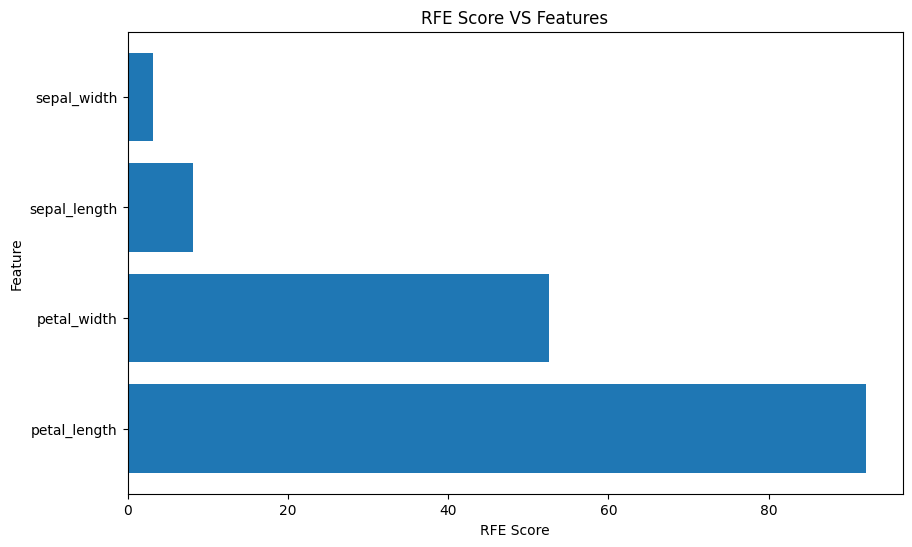

In [15]:

#plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(featureImportancesDf['Features'], featureImportancesDf['RFE Scores'])
plt.xlabel('RFE Score')
plt.ylabel('Feature')
plt.title('RFE Score VS Features')
plt.show()

# Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

#Train random forest and get feature imporances
model = RandomForestClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_

#Display feature importances
feature_importances = pd.DataFrame({'Features': x_train.columns, 'Importance': importances})

print(feature_importances.sort_values('Importance', ascending=False, inplace=True))

None


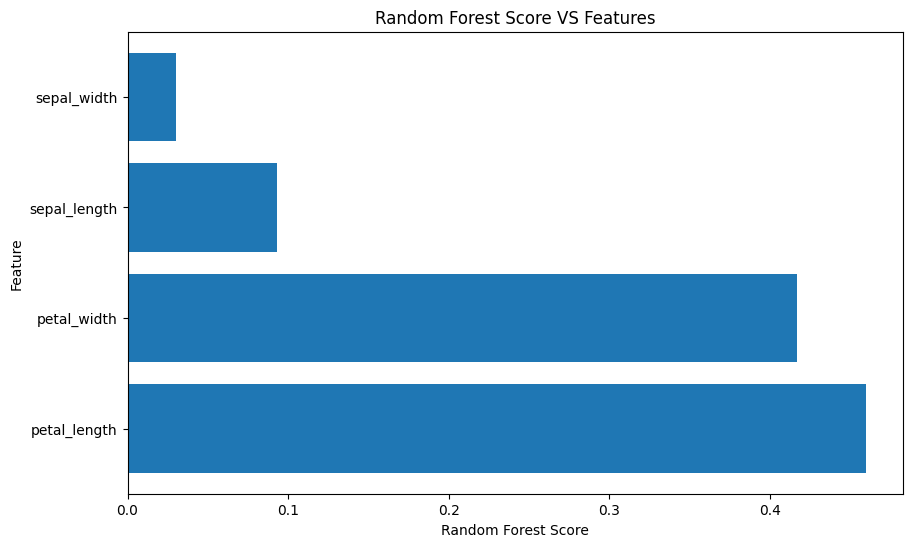

In [17]:

#plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Features'], feature_importances['Importance'])
plt.xlabel('Random Forest Score')
plt.ylabel('Feature')
plt.title('Random Forest Score VS Features')
plt.show()

In [18]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [21]:
import seaborn as sns
df.drop('species', axis=1, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


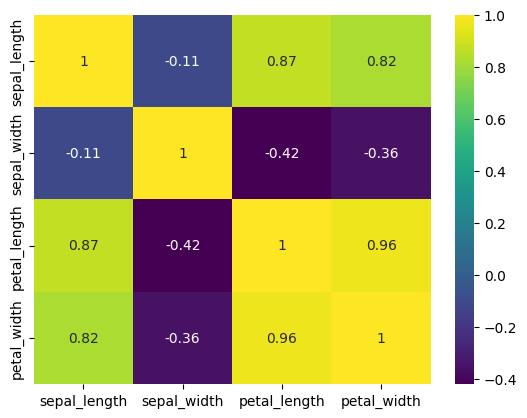

In [24]:
corr_matrix = df.corr()
# sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
sns.heatmap(corr_matrix, cmap='viridis', annot=True)
plt.show()